In [156]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats

In [157]:
df = pd.read_csv('train.csv')
color = pd.read_csv('color_labels.csv')
breed = pd.read_csv('breed_labels.csv')
state = pd.read_csv('state_labels.csv')
typedic = {1:'dog', 2:'cat'}
genderdic = {1:'Male', 2:'Female', 3:'Mixed'}
maturitydic = {1:'Small', 2:'Medium', 3:'Large', 4:'Extra Large', 0:'Not Specified'}
furdic = {1:'Short', 2:'Medium', 3:'Long', 4:'Not Specified'}
vaccdic = {1:'Vaccinated', 2:'Not Vaccinated', 3:'No Info'}
wormdic = {1:'De-wormed', 2:'Not de-wormed', 3:'No Info'}
sterildic = {1:'Sterilized', 2:'Not sterilized', 3:'No Info'}
healthdic = {1:'Healthy', 2:'Minor Injury', 3:'Serious Injury', 0:'Not Specified'}


df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [158]:
list(df.columns)

['Type',
 'Name',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'RescuerID',
 'VideoAmt',
 'Description',
 'PetID',
 'PhotoAmt',
 'AdoptionSpeed']

In [159]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [160]:
categoricals = [df.Type, df.Gender, df.Color1, df.Color2, df.Color3, df.MaturitySize, df.FurLength, df.Vaccinated, df.Dewormed, df.Sterilized, df.Health, df.VideoAmt, df.PhotoAmt, df.AdoptionSpeed]

categoricals = pd.DataFrame(categoricals).T

categoricals.head()

,Type,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,VideoAmt,PhotoAmt,AdoptionSpeed
0,2.0,1.0,1.0,7.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,2.0
1,2.0,1.0,1.0,2.0,0.0,2.0,2.0,3.0,3.0,3.0,1.0,0.0,2.0,0.0
2,1.0,1.0,2.0,7.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,7.0,3.0
3,1.0,2.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,8.0,2.0
4,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,3.0,2.0


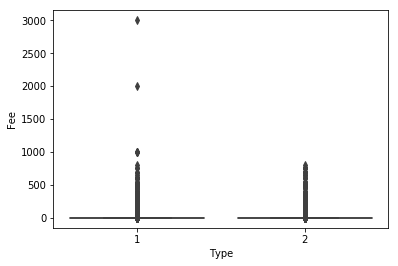

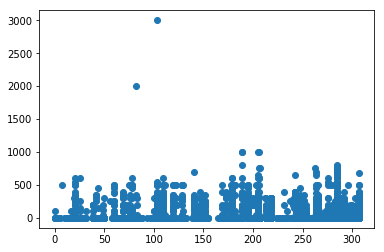

In [161]:
sns.boxplot(x=df.Type, y=df.Fee)
plt.show()
plt.scatter(x=df.Breed1, y=df.Fee)
plt.show()


# There are only couple of data pointsfor dogs, can be accepted as outliers, although outliers seems pretty random, needs special attention. Especially two data point shows clear outlier figures.

In [162]:
df[df.Fee >= 1000]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2078,1,Rottweiler - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Open for Adoption with Fees Looking for new lo...,ecad98f44,1.0,2
4844,1,Coda,7,206,0,2,6,7,0,3,...,1,1,1000,41335,d2a7c2889579271a07100d5668f5cf8f,0,She is pure breed Siberian husky. Born at July...,0038c9343,5.0,2
8722,1,Khaleesi And Drogo,4,103,0,3,1,2,0,3,...,1,2,3000,41325,39d5c79a7422fa53b8fdeaec67b3dbda,0,Both pups are family home trained. They love t...,e74dd0579,5.0,3
8834,1,Adpoted,24,205,0,2,1,2,7,1,...,1,1,1000,41401,67f04f1dc1f81ff09e134fb47a053b10,0,adpoted,aebf47483,2.0,0
8879,1,Rottweiler Semi-Adult - Adoption,8,189,0,2,1,0,0,3,...,1,1,1000,41326,9c895e51a0b8d0290bc3936f3f21fede,0,Looking for new lovely home due to owner lack ...,c3b94defa,2.0,1
10477,1,Bull Dog,24,82,0,1,2,5,7,2,...,1,1,2000,41401,a1c7a4f20bb936fcb8d97039741c40be,0,Found this bull dog near my neighbourhood for ...,31a77d7ba,3.0,1


# There are 6 observations outliers for the price variable.

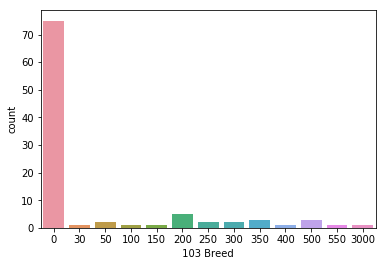

Priced pet cost average:  390.43 (Free pets are excluded)
Priced pet cost median:  250.0 (Free pets are excluded)


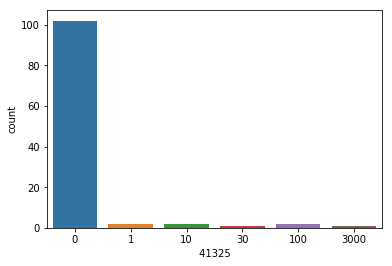

Priced pet cost average:  406.5 (Free pets are excluded)
Priced pet cost median:  20.0 (Free pets are excluded)


In [163]:
# $3000 outlier detail look.

sns.countplot(df[df.Breed1 == 103].Fee)
plt.xlabel(' 103 Breed ')
plt.show()

df103 = df[df.Breed1 == 103]
print('Priced pet cost average: ', round(df103[df103.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df103[df103.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41325].Fee)
plt.xlabel(' 41325 ')
plt.show()

df41325 = df[df.State == 41325]
print('Priced pet cost average: ', round(df41325[df41325.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41325[df41325.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Graphs shows that for both 103 coded breed and state 41325 have no data points showing that 3000 is acceptable data observation, this point is clearly an outlier.

# Among 103 breed, although most of the pets are free, the ones with adoption fees are between 30 - 550, 

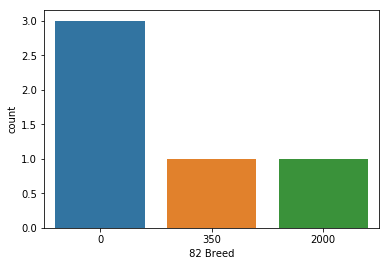

Priced pet cost average:  1175.0 (Free pets are excluded)
Priced pet cost median:  1175.0 (Free pets are excluded)


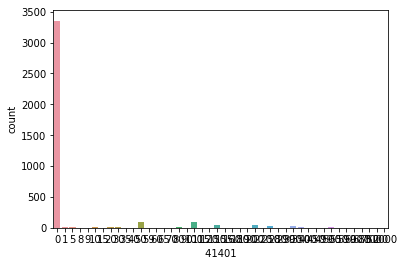

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [164]:
# $2000 outlier detail look.

sns.countplot(df[df.Breed1 == 82].Fee)
plt.xlabel(' 82 Breed ')
plt.show()

df82 = df[df.Breed1 == 82]
print('Priced pet cost average: ', round(df82[df82.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df82[df82.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# Countplot shows that there are only two 82 coded Breed dogs available in the data set and one is without fee, other is 2000. The state wise pet prices are not high either, with mean 139.6 and median 100. 2000 fee can be accepted as outlier.

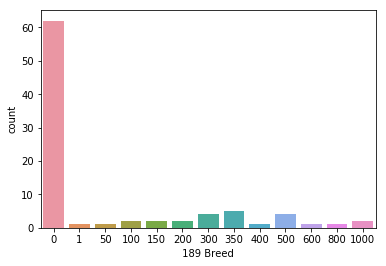

Priced pet cost average:  373.12 (Free pets are excluded)
Priced pet cost median:  350.0 (Free pets are excluded)


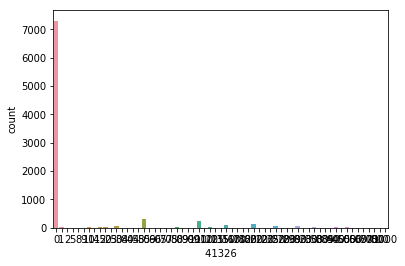

Priced pet cost average:  139.91 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [165]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 189].Fee)
plt.xlabel(' 189 Breed ')
plt.show()

df189 = df[df.Breed1 == 189]
print('Priced pet cost average: ', round(df189[df189.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df189[df189.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41326].Fee)
plt.xlabel(' 41326 ')
plt.show()

df41326 = df[df.State == 41326]
print('Priced pet cost average: ', round(df41326[df41326.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41326[df41326.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 189 breed prices are somewhat equally spreaded from 1 to 1000 and has a mean of 375 and median of 300. Among the same breed 1000 case might be real observation.
# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

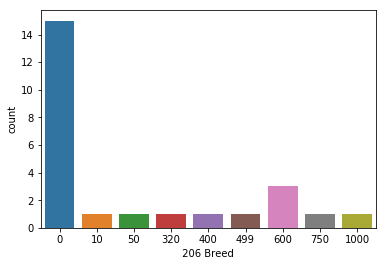

Priced pet cost average:  482.9 (Free pets are excluded)
Priced pet cost median:  549.5 (Free pets are excluded)


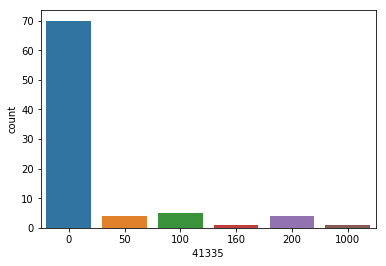

Priced pet cost average:  177.33 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [166]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 206].Fee)
plt.xlabel(' 206 Breed ')
plt.show()

df206 = df[df.Breed1 == 206]
print('Priced pet cost average: ', round(df206[df206.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df206[df206.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41335].Fee)
plt.xlabel(' 41335 ')
plt.show()

df41335 = df[df.State == 41335]
print('Priced pet cost average: ', round(df41335[df41335.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41335[df41335.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 206 breed prices are somewhat equally spreaded from 50 to 1000 and has a mean of 535 and median of 600. Among the same breed 1000 case might be real observation.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can't be counted as outlier.

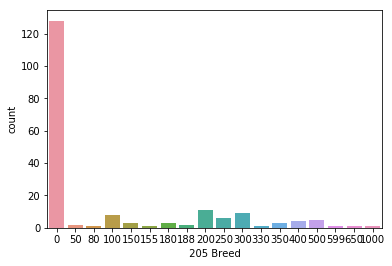

Priced pet cost average:  268.23 (Free pets are excluded)
Priced pet cost median:  225.0 (Free pets are excluded)


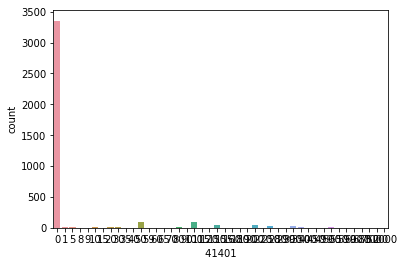

Priced pet cost average:  149.89 (Free pets are excluded)
Priced pet cost median:  100.0 (Free pets are excluded)


In [167]:
# $1000 outlier detail look.

sns.countplot(df[df.Breed1 == 205].Fee)
plt.xlabel(' 205 Breed ')
plt.show()

df205 = df[df.Breed1 == 205]
print('Priced pet cost average: ', round(df205[df205.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df205[df205.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

sns.countplot(df[df.State == 41401].Fee)
plt.xlabel(' 41401 ')
plt.show()

df41401 = df[df.State == 41401]
print('Priced pet cost average: ', round(df41401[df41401.Fee != 0].Fee.mean(),2), '(Free pets are excluded)')
print('Priced pet cost median: ', round(df41401[df41401.Fee != 0].Fee.median(),2), '(Free pets are excluded)')

# 205 breed prices are somewhat  spreaded from 100 to 1000 and has a mean of 337 and median of 300. Among the same breed 1000 case might be real outlier.

# The state wise pet prices are a lot more lower than the 1000, but breed wise pricing is more definitive calculation.

## This observation can be counted as outlier. But decision needs to be made.

# Among all possible outliers in Fee variable, only two records will be discarded as recordin errors.

In [168]:
df = df[df.Fee <= 1000]
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


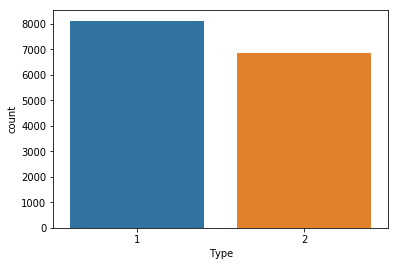

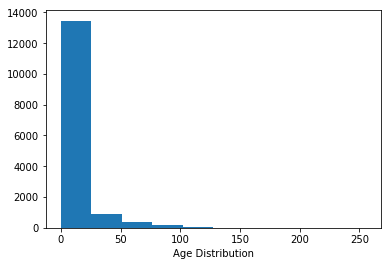

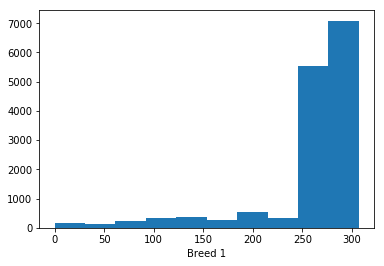

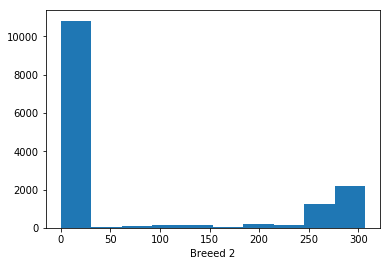

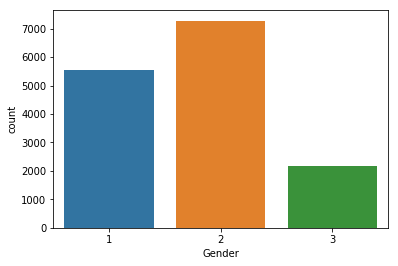

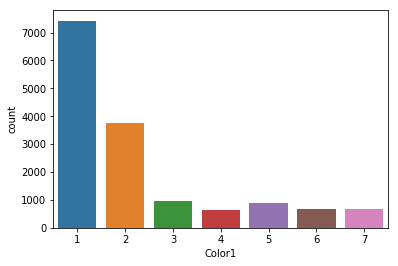

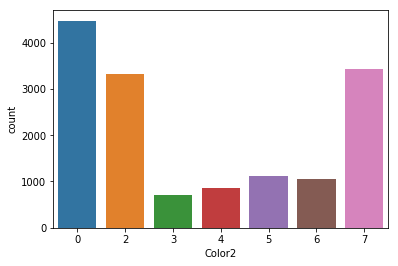

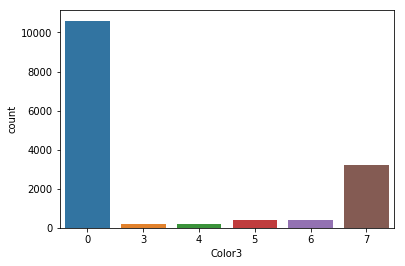

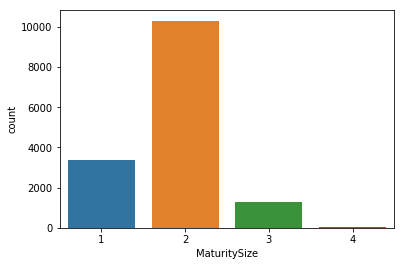

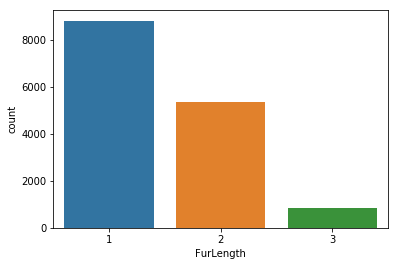

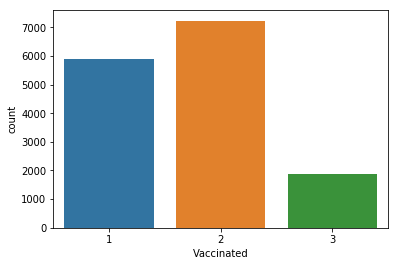

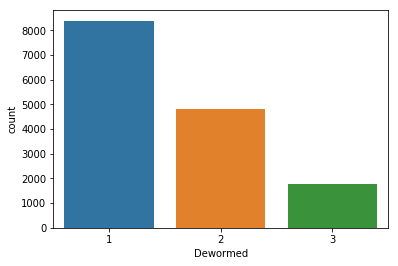

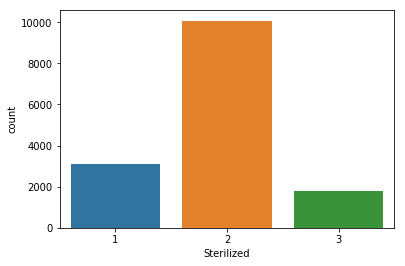

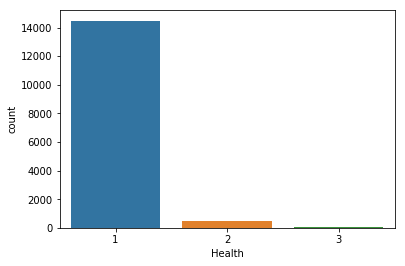

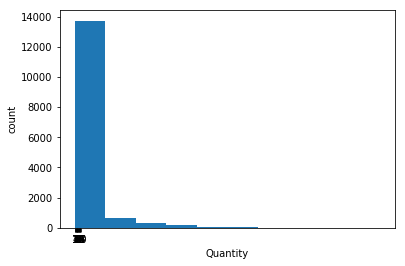

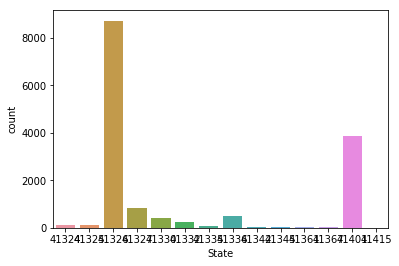

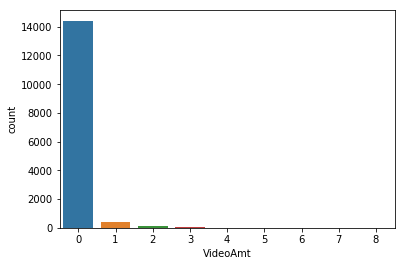

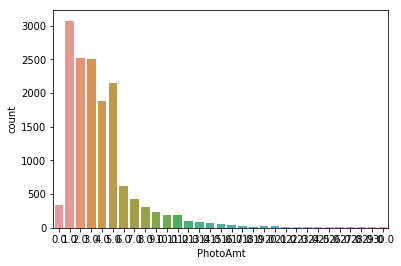

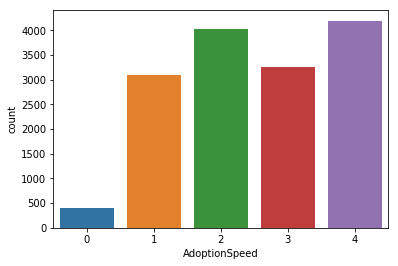

In [169]:
j1 = sns.countplot(df.Type)
j1 = plt.show()
j2 = plt.hist(df.Age)
j2 = plt.xlabel('Age Distribution')
j2 = plt.show()
j3 = plt.hist(df.Breed1)
j3 = plt.xlabel('Breed 1')
j3 = plt.show()
j4 = plt.hist(df.Breed2)
j4 = plt.xlabel('Breeed 2')
j4 = plt.show()

for i in df.columns[5:16]:
    plt.figure()
    sns.countplot(df[i])

j5 = plt.hist(df.Fee)
j5 = plt.show()
j6 = sns.countplot(df.State)
j6 = plt.show()
j7 = sns.countplot(df.VideoAmt)
j7 = plt.show()

for i in df.columns[22:24]:
    plt.figure()
    sns.countplot(df[i])


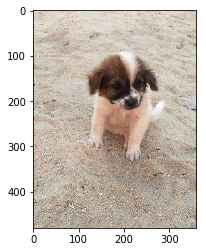

In [170]:
image = mpimg.imread('000a290e4-1.jpg')

plt.imshow(image)

In [171]:
df = df.drop(columns=['Name', 'RescuerID', 'PetID', 'Description'])

In [172]:
dff = df.groupby(['Type', 'Gender'])

In [173]:
dff.describe()

AdoptionSpeed                                               \
                    count      mean       std  min  25%  50%  75%  max   
Type Gender                                                              
1    1             3004.0  2.488682  1.163980  0.0  2.0  2.0  4.0  4.0   
     2             4252.0  2.677093  1.128286  0.0  2.0  3.0  4.0  4.0   
     3              874.0  2.749428  1.112320  0.0  2.0  3.0  4.0  4.0   
2    1             2531.0  2.336231  1.190022  0.0  1.0  2.0  3.0  4.0   
     2             3025.0  2.419174  1.214508  0.0  1.0  2.0  4.0  4.0   
     3             1305.0  2.476628  1.206938  0.0  1.0  2.0  4.0  4.0   

                Age            ...  Vaccinated      VideoAmt            \
              count       mean ...         75%  max    count      mean   
Type Gender                    ...                                       
1    1       3004.0  16.337550 ...         2.0  3.0   3004.0  0.049601   
     2       4252.0  12.114299 ...         2.0  3.0   4252.0  0.056444   
     3        874.0   4.962243 ...         2.0  3.0    874.0  0.100686   
2    1       2531.0   7.657448 ...         2.0  3.0   2531.0  0.054524   
     2       3025.0   8.663471 ...         2.0  3.0   3025.0  0.055537   
     3       1305.0   4.725670 ...         2.0  3.0   1305.0  0.052107   

                                                
                  std  min  25%  50%  75%  max  
Type Gender                                     
1    1       0.302949  0.0  0.0  0.0  0.0  4.0  
     2       0.344481  0.0  0.0  0.0  0.0  8.0  
     3       0.583409  0.0  0.0  0.0  0.0  8.0  
2    1       0.317149  0.0  0.0  0.0  0.0  6.0  
     2       0.326654  0.0  0.0  0.0  0.0  6.0  
     3       0.328195  0.0  0.0  0.0  0.0  4.0  

[6 rows x 144 columns]

In [174]:
df = df.rename(columns={'Breed1' : 'zBreed1', 'Breed2' : 'zBreed2', 'State' : 'zState'})
df = df.reindex(sorted(df.columns), axis=1)

In [175]:
dog = df[df.Type == 1]
cat = df[df.Type == 2]

In [176]:
for i in dog.columns:
    print('Adoption Speed and', i, 'Crosstab for DOGS')
    print(' ')
    print(pd.crosstab(dog.AdoptionSpeed, dog[i]))
    print(' ')

Adoption Speed and AdoptionSpeed Crosstab for DOGS
 
AdoptionSpeed    0     1     2     3     4
AdoptionSpeed                             
0              170     0     0     0     0
1                0  1434     0     0     0
2                0     0  2164     0     0
3                0     0     0  1948     0
4                0     0     0     0  2414
 
Adoption Speed and Age Crosstab for DOGS
 
Age            0    1    2    3    4    5    6    7    8    9   ...   123  \
AdoptionSpeed                                                   ...         
0                3   19   44   13    6    2    5    1    1    1 ...     0   
1               24  289  400  151   67   34   30   15   10   12 ...     0   
2               25  443  635  270  101   58   32   20   41   30 ...     0   
3               20  341  482  253  122   53   57   32   35   19 ...     0   
4               13  196  423  252  178   93   99   52   70   37 ...     1   

Age            132  135  144  156  168  180  212  238  255  


zBreed1        0    1    3    5    7    10   11   15   16   17   ...   227  \
AdoptionSpeed                                                    ...         
0                0    0    0    0    0    0    0    0    0    0  ...     0   
1                0    0    0    1    0    0    0    3    0    1  ...     0   
2                0    0    0    0    0    0    0    0    0    0  ...     0   
3                2    0    0    0    0    3    0    3    0    3  ...     1   
4                2    2    1    1    1    0    2    2    1    2  ...     2   

zBreed1        228  231  232  233  234  237  239  240   307  
AdoptionSpeed                                                
0                0    0    0    0    0    0    0    1    81  
1                0    1    0    1    0    0    0    1   859  
2                1    2    0    0    1    1    3    3  1575  
3                0    3    2    1    1    0    9    0  1381  
4                0    1    0    0    0    1    0    0  2027  

[5 rows x 116 colu

# Adoption Speed and Age relation needs special care, there is a big increase among 24 months of age pets. And 1-5 months are most popular ages.

# Black and Brown colors are most popular colors. Gray and White is also favorable.

# Deworming is important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption.

# Gender is not an important criteria but Female pets are slightly favorable.

# Healthy pets are favorable.

# Medium sized dogs are popular sized pets.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of dogs.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is not so important.

# Video is not the primary criteria.

# Breed matters but since the biggest proportion is labeled as Mixed Breed, needs special care.

# There are either pet friendly states or pet available states, this needs further examination.

In [177]:
for i in cat.columns:
    print('Adoption Speed and', i, 'Crosstab for CATS')
    print(' ')
    print(pd.crosstab(cat.AdoptionSpeed, cat[i]))
    print(' ')

Adoption Speed and AdoptionSpeed Crosstab for CATS
 
AdoptionSpeed    0     1     2     3     4
AdoptionSpeed                             
0              240     0     0     0     0
1                0  1655     0     0     0
2                0     0  1873     0     0
3                0     0     0  1310     0
4                0     0     0     0  1783
 
Adoption Speed and Age Crosstab for CATS
 
Age            0    1    2    3    4    5    6    7    8    9   ...   92   \
AdoptionSpeed                                                   ...         
0                7   35   71   31   18    5   15    6    3    4 ...     0   
1               26  354  465  257  144   66   50   28   26   12 ...     0   
2               19  311  485  316  164   99   85   39   27   21 ...     1   
3               19  170  301  205  137   82   58   30   35   12 ...     0   
4               23  146  197  218  171  103  127   58   61   36 ...     0   

Age            96   108  112  120  132  144  147  180  212  


zState         41324  41325  41326  41327  41330  41332  41335  41336  41342  \
AdoptionSpeed                                                                  
0                  2      2    137      3      0      3      3     12      1   
1                  7      7    992     42      6     22     19     47      0   
2                 10     15   1092     49     18     38      7     64      0   
3                  8     12    728     60     28     18     12     45      2   
4                 23     17    872     78     40     30     10     61      8   

zState         41345  41361  41367  41401  41415  
AdoptionSpeed                                     
0                  1      0      1     75      0  
1                  5      8      3    497      0  
2                  0      2      3    575      0  
3                  4      5      1    387      0  
4                  7      8      4    624      1  
 


# 1-5 months are most popular ages.

# Color preference spread among the colors.

# Deworming is not important while adopting.

# Fee is important during adoption.

# Furlength is important during adoption. Short furs are more favorable.

# Gender is not an important criteria.

# Healthy pets are favorable.

# Medium sized cats are popular sized pets. Large sizes are less likely to be adopted.

# Photo amounts matter, especially longer waiting periods might be preventable with more photos. Optimum number of photos needs to be defined.

# Competition might have negative effect among same types of cats.

# Non-sterilized dogs are more in favor. Reason behind that needs to be uncovered.

# Vaccination is important.

# Video is not the primary criteria.

# Breed matters among the cats.
e.
# There are either pet friendly states or pet available states, this needs further examination.

In [ ]:
sns.swarmplot(x=df.Color1, y=df.Color2, hue=df.Type)

In [ ]:
# Categorical correlations needs to be calculated.
# Logistic regression
# What ML techniques are there
# 